In [1]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
from collections import Counter
from nltk.tokenize import LineTokenizer, SpaceTokenizer, TweetTokenizer
from nltk import word_tokenize
from nltk import word_tokenize, PorterStemmer, WordNetLemmatizer
import string
import matplotlib
import re
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


## Reading the file

In [2]:
# Using the interactive shell to see values of multiple statements at once
df=pd.read_csv('//Users//vaibhavagarwal//Desktop//ML-NEU//MercarI//all//train.tsv',sep='\t',header=0)



In [3]:
df_known_brands=df[~(df.brand_name.isna())]

In [4]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vaibhavagarwal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/vaibhavagarwal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Finding records with missing brands

In [6]:
# df_brand_present=df[~df.brand_name.isna()]
df_known_brands.head(5)
df_known_brands.shape
# df_true_50000=df_brand_present[0:50000]
# df_true_50000.head(2) 
# df_true_50000.tail(2)
#df_miss_50000=df_miss[0:50000:]

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
6,6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...
7,7,Girls cheer and tumbling bundle of 7,3,Sports & Outdoors/Apparel/Girls,Soffe,6.0,1,You get three pairs of Sophie cheer shorts siz...
8,8,Girls Nike Pro shorts,3,Sports & Outdoors/Apparel/Girls,Nike,19.0,0,Girls Size small Plus green. Three shorts total.


(849853, 8)

## Sub-categorizing categories into 3 types

In [7]:
def subCategorize(category):
    try: return category.split("/")
    except: return ("NoLabel","NoLabel","NoLabel")
    

df_known_brands['sub_cat1'],df_known_brands['sub_cat2'],df_known_brands['sub_cat3']=\
zip(*df_known_brands['category_name'].apply(lambda x:subCategorize(x)))

/Users/vaibhavagarwal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Concatenating categorial features together 

In [ ]:
# Removing brand_name from below to make it consistent with records not having brand_names

In [10]:
df_known_brands['text']=df_known_brands['name'].map(str)+ ' ' + df_known_brands['sub_cat1'].map(str)+ ' ' + df_known_brands['sub_cat2'].map(str)+' ' + df_known_brands['sub_cat3'].map(str)+' '+ df_known_brands['item_description'].map(str)


/Users/vaibhavagarwal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
df_known_brands.head(100)
df_known_brands[df_known_brands.item_description!='No description yet']

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,sub_cat1,sub_cat2,sub_cat3,text
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts,Razer BlackWidow Chroma Keyboard Electronics C...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse,AVA-VIV Blouse Women Tops & Blouses Blouse Ado...
6,6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...,Women,Swimwear,Two-Piece,Acacia pacific tides santorini top Women Swimw...
7,7,Girls cheer and tumbling bundle of 7,3,Sports & Outdoors/Apparel/Girls,Soffe,6.0,1,You get three pairs of Sophie cheer shorts siz...,Sports & Outdoors,Apparel,Girls,Girls cheer and tumbling bundle of 7 Sports & ...
8,8,Girls Nike Pro shorts,3,Sports & Outdoors/Apparel/Girls,Nike,19.0,0,Girls Size small Plus green. Three shorts total.,Sports & Outdoors,Apparel,Girls,Girls Nike Pro shorts Sports & Outdoors Appare...
10,10,Smashbox primer,2,Beauty/Makeup/Face,Smashbox,8.0,1,0.25 oz Full size is 1oz for [rm] in Sephora,Beauty,Makeup,Face,Smashbox primer Beauty Makeup Face 0.25 oz Ful...
11,11,New vs pi k body mists,1,Beauty/Fragrance/Women,Victoria's Secret,34.0,0,(5) new vs pink body mists (2.5 oz each) Fresh...,Beauty,Fragrance,Women,New vs pi k body mists Beauty Fragrance Women ...
12,12,Black Skater dress,2,"Women/Dresses/Above Knee, Mini",rue,16.0,0,"Xl, great condition",Women,Dresses,"Above Knee, Mini","Black Skater dress Women Dresses Above Knee, M..."
13,13,Sharpener and eraser,1,Other/Office supplies/School Supplies,Scholastic,4.0,1,No description yet,Other,Office supplies,School Supplies,Sharpener and eraser Other Office supplies Sch...
14,14,HOLD for Dogs2016 Minnetonka boots,3,Women/Shoes/Boots,UGG Australia,43.0,0,Authentic. Suede fringe boots. Great condition...,Women,Shoes,Boots,HOLD for Dogs2016 Minnetonka boots Women Shoes...


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,sub_cat1,sub_cat2,sub_cat3,text
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts,Razer BlackWidow Chroma Keyboard Electronics C...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse,AVA-VIV Blouse Women Tops & Blouses Blouse Ado...
6,6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...,Women,Swimwear,Two-Piece,Acacia pacific tides santorini top Women Swimw...
7,7,Girls cheer and tumbling bundle of 7,3,Sports & Outdoors/Apparel/Girls,Soffe,6.0,1,You get three pairs of Sophie cheer shorts siz...,Sports & Outdoors,Apparel,Girls,Girls cheer and tumbling bundle of 7 Sports & ...
8,8,Girls Nike Pro shorts,3,Sports & Outdoors/Apparel/Girls,Nike,19.0,0,Girls Size small Plus green. Three shorts total.,Sports & Outdoors,Apparel,Girls,Girls Nike Pro shorts Sports & Outdoors Appare...
10,10,Smashbox primer,2,Beauty/Makeup/Face,Smashbox,8.0,1,0.25 oz Full size is 1oz for [rm] in Sephora,Beauty,Makeup,Face,Smashbox primer Beauty Makeup Face 0.25 oz Ful...
11,11,New vs pi k body mists,1,Beauty/Fragrance/Women,Victoria's Secret,34.0,0,(5) new vs pink body mists (2.5 oz each) Fresh...,Beauty,Fragrance,Women,New vs pi k body mists Beauty Fragrance Women ...
12,12,Black Skater dress,2,"Women/Dresses/Above Knee, Mini",rue,16.0,0,"Xl, great condition",Women,Dresses,"Above Knee, Mini","Black Skater dress Women Dresses Above Knee, M..."
14,14,HOLD for Dogs2016 Minnetonka boots,3,Women/Shoes/Boots,UGG Australia,43.0,0,Authentic. Suede fringe boots. Great condition...,Women,Shoes,Boots,HOLD for Dogs2016 Minnetonka boots Women Shoes...
15,15,Sephora tarte birthday gift,1,Beauty/Makeup/Makeup Sets,Tarte,11.0,1,Brand new. Deluxe travel size products. Contai...,Beauty,Makeup,Makeup Sets,Sephora tarte birthday gift Beauty Makeup Make...


## Exploratory analysis on Categories

In [12]:
print("There are %d unique first sub-categories." % df_known_brands['sub_cat1'].nunique())
print("There are %d unique first sub-categories." % df_known_brands['sub_cat2'].nunique())
print("There are %d unique first sub-categories." % df_known_brands['sub_cat3'].nunique())

There are 11 unique first sub-categories.
There are 105 unique first sub-categories.
There are 670 unique first sub-categories.


Women                     453543
Beauty                    111588
Kids                       87910
Men                        70549
Electronics                60061
Home                       26528
Vintage & Collectibles     20927
Sports & Outdoors           9267
Other                       6540
NoLabel                     2870
Handmade                      70
Name: sub_cat1, dtype: int64

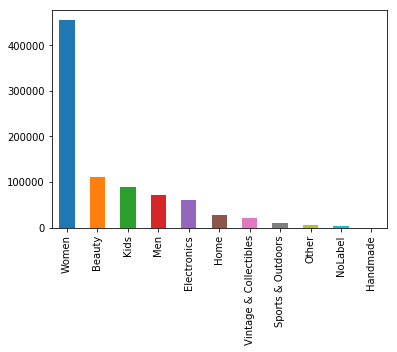

In [13]:
%matplotlib inline 
cat_counts=df_known_brands['sub_cat1'].value_counts()
cat_counts
cat_counts.plot(kind="bar")


## Text preprocessing using
- Regular Expressions
- Tokenizers
- Stemming
- Lemmatizers


In [15]:
def removeSpecialCharacters(text):
    return text.translate ({ord(c): " " for c in "!@#$%^&*()[]{};:,./<>?\|`~-=_+"})
df_known_brands['text'].apply(lambda x:removeSpecialCharacters(x))

1          Razer BlackWidow Chroma Keyboard Electronics C...
2          AVA VIV Blouse Women Tops   Blouses Blouse Ado...
6          Acacia pacific tides santorini top Women Swimw...
7          Girls cheer and tumbling bundle of 7 Sports   ...
8          Girls Nike Pro shorts Sports   Outdoors Appare...
10         Smashbox primer Beauty Makeup Face 0 25 oz Ful...
11         New vs pi k body mists Beauty Fragrance Women ...
12         Black Skater dress Women Dresses Above Knee  M...
13         Sharpener and eraser Other Office supplies Sch...
14         HOLD for Dogs2016 Minnetonka boots Women Shoes...
15         Sephora tarte birthday gift Beauty Makeup Make...
16         Glitter Eyeshadow Beauty Makeup Eyes 2 glitter...
18         Too Faced Limited "Merry Macaroons" Beauty Mak...
19         Cream  Beige Front Cross Shirt Women Tops   Bl...
20         Torrid Nautical Peplum Tube Top Women Tops   B...
21         NWT VS ULTIMATE SPORTS BRA 34ddd Women Athleti...
22         Galaxy S7 Edg

In [16]:
# apply word tokenize to extract tokens from every text row
# word_tokens=df_miss['text'].apply(word_tokenize)
# word_tokens.head(2)
# apply tweet tokenizer to extract tokens from every text row
tTokenizer = TweetTokenizer()
tweet_tokens=df_known_brands['text'].apply(tTokenizer.tokenize)
tweet_tokens.head(2)

# storing tweet tokens in new derived column of dataset
df_known_brands['tokens']=tweet_tokens
df_known_brands.head(2)



1    [Razer, BlackWidow, Chroma, Keyboard, Electron...
2    [AVA-VIV, Blouse, Women, Tops, &, Blouses, Blo...
Name: text, dtype: object

/Users/vaibhavagarwal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,sub_cat1,sub_cat2,sub_cat3,text,tokens
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts,Razer BlackWidow Chroma Keyboard Electronics C...,"[Razer, BlackWidow, Chroma, Keyboard, Electron..."
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse,AVA-VIV Blouse Women Tops & Blouses Blouse Ado...,"[AVA-VIV, Blouse, Women, Tops, &, Blouses, Blo..."


In [17]:
#  Derive the size column by picking up numbers before removing the numbers from tokens list
def getSize(token):
    indices=[ind for ind,w in enumerate(token) if re.search('^[Ss][i][z][e]$',w)]
    sizes=[token[index+1] for index in indices if index<len(token)-1]
    return sizes

df_known_brands['Size']=df_known_brands['tokens'].apply(lambda x:getSize(x))
# lets check the df for size column where it has values
df_known_brands[df_known_brands['Size'].str.len()>0].head(5)



/Users/vaibhavagarwal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,sub_cat1,sub_cat2,sub_cat3,text,tokens,Size
6,6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...,Women,Swimwear,Two-Piece,Acacia pacific tides santorini top Women Swimw...,"[Acacia, pacific, tides, santorini, top, Women...",[small]
7,7,Girls cheer and tumbling bundle of 7,3,Sports & Outdoors/Apparel/Girls,Soffe,6.0,1,You get three pairs of Sophie cheer shorts siz...,Sports & Outdoors,Apparel,Girls,Girls cheer and tumbling bundle of 7 Sports & ...,"[Girls, cheer, and, tumbling, bundle, of, 7, S...",[small]
8,8,Girls Nike Pro shorts,3,Sports & Outdoors/Apparel/Girls,Nike,19.0,0,Girls Size small Plus green. Three shorts total.,Sports & Outdoors,Apparel,Girls,Girls Nike Pro shorts Sports & Outdoors Appare...,"[Girls, Nike, Pro, shorts, Sports, &, Outdoors...",[small]
10,10,Smashbox primer,2,Beauty/Makeup/Face,Smashbox,8.0,1,0.25 oz Full size is 1oz for [rm] in Sephora,Beauty,Makeup,Face,Smashbox primer Beauty Makeup Face 0.25 oz Ful...,"[Smashbox, primer, Beauty, Makeup, Face, 0.25,...",[is]
14,14,HOLD for Dogs2016 Minnetonka boots,3,Women/Shoes/Boots,UGG Australia,43.0,0,Authentic. Suede fringe boots. Great condition...,Women,Shoes,Boots,HOLD for Dogs2016 Minnetonka boots Women Shoes...,"[HOLD, for, Dogs, 2016, Minnetonka, boots, Wom...",[7]


In [18]:
stopwords = nltk.corpus.stopwords.words('english')
wordnet_lemmatizer = WordNetLemmatizer()
#Using tweet tokenizers for further preprocessing
def tokenizer(tokens):
    tokens= list(filter(lambda t: t not in punctuation, tokens))
    tokens = list(filter(lambda t: t.lower() not in stopwords, tokens))
    tokens_filtered = []
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            tokens_filtered.append(token)
    tokens_filtered = list(map(lambda token: wordnet_lemmatizer.lemmatize(token.lower()), tokens_filtered))
    tokens_filtered = list(filter(lambda t: t not in punctuation, tokens_filtered))
    return tokens_filtered
# overriding the tokens now will filtered token       
# df_miss['tokens']=tokens_filtered  
# df_miss.head(2) 
df_known_brands['tokens']=df_known_brands['tokens'].map(tokenizer)
df_known_brands.head(2)

/Users/vaibhavagarwal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,sub_cat1,sub_cat2,sub_cat3,text,tokens,Size
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts,Razer BlackWidow Chroma Keyboard Electronics C...,"[razer, blackwidow, chroma, keyboard, electron...",[]
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse,AVA-VIV Blouse Women Tops & Blouses Blouse Ado...,"[ava-viv, blouse, woman, top, blouse, blouse, ...",[]


In [21]:
# getting the mostcommon word used for each row in the dataset
def getmostCommonword(tokens):
    fdistPlain = nltk.FreqDist(tokens)
    return (fdistPlain.most_common(1)[0][0])

df_known_brands['MostCommonWord']=df_known_brands['tokens'].map(getmostCommonword)
df_known_brands.head(100)


/Users/vaibhavagarwal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,sub_cat1,sub_cat2,sub_cat3,text,tokens,Size,MostCommonWord
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts,Razer BlackWidow Chroma Keyboard Electronics C...,"[razer, blackwidow, chroma, keyboard, electron...",[],razer
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse,AVA-VIV Blouse Women Tops & Blouses Blouse Ado...,"[ava-viv, blouse, woman, top, blouse, blouse, ...",[],blouse
6,6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...,Women,Swimwear,Two-Piece,Acacia pacific tides santorini top Women Swimw...,"[acacia, pacific, tide, santorini, top, woman,...",[small],acacia
7,7,Girls cheer and tumbling bundle of 7,3,Sports & Outdoors/Apparel/Girls,Soffe,6.0,1,You get three pairs of Sophie cheer shorts siz...,Sports & Outdoors,Apparel,Girls,Girls cheer and tumbling bundle of 7 Sports & ...,"[girl, cheer, tumbling, bundle, sport, outdoor...",[small],girl
8,8,Girls Nike Pro shorts,3,Sports & Outdoors/Apparel/Girls,Nike,19.0,0,Girls Size small Plus green. Three shorts total.,Sports & Outdoors,Apparel,Girls,Girls Nike Pro shorts Sports & Outdoors Appare...,"[girl, nike, pro, short, sport, outdoors, appa...",[small],girl
10,10,Smashbox primer,2,Beauty/Makeup/Face,Smashbox,8.0,1,0.25 oz Full size is 1oz for [rm] in Sephora,Beauty,Makeup,Face,Smashbox primer Beauty Makeup Face 0.25 oz Ful...,"[smashbox, primer, beauty, makeup, face, oz, f...",[is],smashbox
11,11,New vs pi k body mists,1,Beauty/Fragrance/Women,Victoria's Secret,34.0,0,(5) new vs pink body mists (2.5 oz each) Fresh...,Beauty,Fragrance,Women,New vs pi k body mists Beauty Fragrance Women ...,"[new, v, pi, k, body, mist, beauty, fragrance,...",[],new
12,12,Black Skater dress,2,"Women/Dresses/Above Knee, Mini",rue,16.0,0,"Xl, great condition",Women,Dresses,"Above Knee, Mini","Black Skater dress Women Dresses Above Knee, M...","[black, skater, dress, woman, dress, knee, min...",[],dress
13,13,Sharpener and eraser,1,Other/Office supplies/School Supplies,Scholastic,4.0,1,No description yet,Other,Office supplies,School Supplies,Sharpener and eraser Other Office supplies Sch...,"[sharpener, eraser, office, supply, school, su...",[],supply
14,14,HOLD for Dogs2016 Minnetonka boots,3,Women/Shoes/Boots,UGG Australia,43.0,0,Authentic. Suede fringe boots. Great condition...,Women,Shoes,Boots,HOLD for Dogs2016 Minnetonka boots Women Shoes...,"[hold, dog, minnetonka, boot, woman, shoe, boo...",[7],boot


In [19]:
# selecting unique brand names present in the dataset
# df_brands=df[(~df.brand_name.isin(df_miss.brand_name))]
df_unique_brands=df_known_brands['brand_name'].value_counts().index.tolist()
df_unique_brands
# type(uniq_brands)


['PINK',
 'Nike',
 "Victoria's Secret",
 'LuLaRoe',
 'Apple',
 'FOREVER 21',
 'Nintendo',
 'Lululemon',
 'Michael Kors',
 'American Eagle',
 'Rae Dunn',
 'Sephora',
 'Coach',
 'Disney',
 'Bath & Body Works',
 'Adidas',
 'Funko',
 'Under Armour',
 'Sony',
 'Old Navy',
 'Hollister',
 "Carter's",
 'Urban Decay',
 'The North Face',
 'Independent',
 'Too Faced',
 'Xbox',
 'Brandy Melville',
 'Kate Spade',
 'MAC',
 'Kendra Scott',
 'Gap',
 'Tarte',
 'UGG Australia',
 'VANS',
 'Polo Ralph Lauren',
 'Charlotte Russe',
 'Samsung',
 'SeneGence',
 'Vera Bradley',
 'Ralph Lauren',
 'Converse',
 'H&M',
 'Air Jordan',
 'Free People',
 'Tory Burch',
 'Miss Me',
 'Express',
 'Louis Vuitton',
 'Abercrombie & Fitch',
 'NYX',
 'Hot Topic',
 'Pokemon',
 'Lilly Pulitzer',
 'Calvin Klein',
 'Kylie Cosmetics',
 "Levi's®",
 'PANDORA',
 'Mary Kay',
 'American Boy & Girl',
 'Anastasia Beverly Hills',
 'Torrid',
 'Chanel',
 'Benefit',
 'Tommy Hilfiger',
 'Steve Madden',
 'Mossimo',
 'Scentsy',
 'Aeropostale',
 '

## Fuzzyset to predict Brand names for the missing brands

In [22]:
import fuzzyset
 
fz = fuzzyset.FuzzySet()
#Create a list of terms we would like to match against in a fuzzy way
for brand in df_unique_brands:
    fz.add(brand)
 
#Now see if our sample term fuzzy matches any of those specified terms
def estimatebrandMatches(word):
    return fz.get(word)

df_known_brands['brand_prediction']=df_known_brands['MostCommonWord'].map(estimatebrandMatches)
    

/Users/vaibhavagarwal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [23]:
df_known_brands.head(100)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,sub_cat1,sub_cat2,sub_cat3,text,tokens,Size,MostCommonWord,brand_prediction
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts,Razer BlackWidow Chroma Keyboard Electronics C...,"[razer, blackwidow, chroma, keyboard, electron...",[],razer,"[(1, Razer)]"
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse,AVA-VIV Blouse Women Tops & Blouses Blouse Ado...,"[ava-viv, blouse, woman, top, blouse, blouse, ...",[],blouse,"[(0.6666666666666667, BLUE), (0.66666666666666..."
6,6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...,Women,Swimwear,Two-Piece,Acacia pacific tides santorini top Women Swimw...,"[acacia, pacific, tide, santorini, top, woman,...",[small],acacia,"[(0.6666666666666667, Gracia)]"
7,7,Girls cheer and tumbling bundle of 7,3,Sports & Outdoors/Apparel/Girls,Soffe,6.0,1,You get three pairs of Sophie cheer shorts siz...,Sports & Outdoors,Apparel,Girls,Girls cheer and tumbling bundle of 7 Sports & ...,"[girl, cheer, tumbling, bundle, sport, outdoor...",[small],girl,"[(0.75, Giro)]"
8,8,Girls Nike Pro shorts,3,Sports & Outdoors/Apparel/Girls,Nike,19.0,0,Girls Size small Plus green. Three shorts total.,Sports & Outdoors,Apparel,Girls,Girls Nike Pro shorts Sports & Outdoors Appare...,"[girl, nike, pro, short, sport, outdoors, appa...",[small],girl,"[(0.75, Giro)]"
10,10,Smashbox primer,2,Beauty/Makeup/Face,Smashbox,8.0,1,0.25 oz Full size is 1oz for [rm] in Sephora,Beauty,Makeup,Face,Smashbox primer Beauty Makeup Face 0.25 oz Ful...,"[smashbox, primer, beauty, makeup, face, oz, f...",[is],smashbox,"[(1, Smashbox)]"
11,11,New vs pi k body mists,1,Beauty/Fragrance/Women,Victoria's Secret,34.0,0,(5) new vs pink body mists (2.5 oz each) Fresh...,Beauty,Fragrance,Women,New vs pi k body mists Beauty Fragrance Women ...,"[new, v, pi, k, body, mist, beauty, fragrance,...",[],new,"[(0.5, Nerf), (0.5, Neff), (0.5, NECA), (0.5, ..."
12,12,Black Skater dress,2,"Women/Dresses/Above Knee, Mini",rue,16.0,0,"Xl, great condition",Women,Dresses,"Above Knee, Mini","Black Skater dress Women Dresses Above Knee, M...","[black, skater, dress, woman, dress, knee, min...",[],dress,"[(0.6, Tess), (0.6, GUESS), (0.6, Russ)]"
13,13,Sharpener and eraser,1,Other/Office supplies/School Supplies,Scholastic,4.0,1,No description yet,Other,Office supplies,School Supplies,Sharpener and eraser Other Office supplies Sch...,"[sharpener, eraser, office, supply, school, su...",[],supply,"[(0.5, Supra), (0.5, Superdry), (0.5, Apple), ..."
14,14,HOLD for Dogs2016 Minnetonka boots,3,Women/Shoes/Boots,UGG Australia,43.0,0,Authentic. Suede fringe boots. Great condition...,Women,Shoes,Boots,HOLD for Dogs2016 Minnetonka boots Women Shoes...,"[hold, dog, minnetonka, boot, woman, shoe, boo...",[7],boot,"[(0.8, Boots)]"


In [25]:
df_known_brands[['brand_name','brand_prediction']].head(1000)

,brand_name,brand_prediction
1,Razer,"[(1, Razer)]"
2,Target,"[(0.6666666666666667, BLUE), (0.66666666666666..."
6,Acacia Swimwear,"[(0.6666666666666667, Gracia)]"
7,Soffe,"[(0.75, Giro)]"
8,Nike,"[(0.75, Giro)]"
10,Smashbox,"[(1, Smashbox)]"
11,Victoria's Secret,"[(0.5, Nerf), (0.5, Neff), (0.5, NECA), (0.5, ..."
12,rue,"[(0.6, Tess), (0.6, GUESS), (0.6, Russ)]"
13,Scholastic,"[(0.5, Supra), (0.5, Superdry), (0.5, Apple), ..."
14,UGG Australia,"[(0.8, Boots)]"


In [32]:
# df_miss_50000.assign(**pd.DataFrame(df_miss_50000.brand_prediction.values.tolist()))
df_known_brands=df_known_brands.assign(**df_known_brands.brand_prediction.apply(pd.Series).add_prefix('val_'))
df_known_brands.head(100)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,sub_cat1,sub_cat2,...,val_24,val_25,val_26,val_27,val_28,val_29,val_30,val_31,val_32,val_33
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...,Women,Swimwear,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,Girls cheer and tumbling bundle of 7,3,Sports & Outdoors/Apparel/Girls,Soffe,6.0,1,You get three pairs of Sophie cheer shorts siz...,Sports & Outdoors,Apparel,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,Girls Nike Pro shorts,3,Sports & Outdoors/Apparel/Girls,Nike,19.0,0,Girls Size small Plus green. Three shorts total.,Sports & Outdoors,Apparel,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,10,Smashbox primer,2,Beauty/Makeup/Face,Smashbox,8.0,1,0.25 oz Full size is 1oz for [rm] in Sephora,Beauty,Makeup,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,11,New vs pi k body mists,1,Beauty/Fragrance/Women,Victoria's Secret,34.0,0,(5) new vs pink body mists (2.5 oz each) Fresh...,Beauty,Fragrance,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,12,Black Skater dress,2,"Women/Dresses/Above Knee, Mini",rue,16.0,0,"Xl, great condition",Women,Dresses,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,13,Sharpener and eraser,1,Other/Office supplies/School Supplies,Scholastic,4.0,1,No description yet,Other,Office supplies,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,14,HOLD for Dogs2016 Minnetonka boots,3,Women/Shoes/Boots,UGG Australia,43.0,0,Authentic. Suede fringe boots. Great condition...,Women,Shoes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df_known_brands.columns

Index(['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping', 'item_description', 'sub_cat1', 'sub_cat2',
       'sub_cat3', 'text', 'tokens', 'Size', 'MostCommonWord',
       'brand_prediction'],
      dtype='object')

In [30]:
df_known_brands=df_known_brands.iloc[:,0:18]

# df_miss_50000_copy=df_miss_50000_copy.drop(['val_1', 'val_2', 'val_3', 'val_4',
#        'val_5', 'val_6', 'val_7', 'val_8', 'val_9', 'val_10', 'val_11',
#        'val_12', 'val_13', 'val_14', 'val_15', 'val_16', 'val_17', 'val_18'],axis=1)

df_known_brands.head(5)
# df_true_50000_copy=df_true_50000

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,sub_cat1,sub_cat2,sub_cat3,text,tokens,Size,MostCommonWord,brand_prediction
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts,Razer BlackWidow Chroma Keyboard Electronics C...,"[razer, blackwidow, chroma, keyboard, electron...",[],razer,"[(1, Razer)]"
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse,AVA-VIV Blouse Women Tops & Blouses Blouse Ado...,"[ava-viv, blouse, woman, top, blouse, blouse, ...",[],blouse,"[(0.6666666666666667, BLUE), (0.66666666666666..."
6,6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...,Women,Swimwear,Two-Piece,Acacia pacific tides santorini top Women Swimw...,"[acacia, pacific, tide, santorini, top, woman,...",[small],acacia,"[(0.6666666666666667, Gracia)]"
7,7,Girls cheer and tumbling bundle of 7,3,Sports & Outdoors/Apparel/Girls,Soffe,6.0,1,You get three pairs of Sophie cheer shorts siz...,Sports & Outdoors,Apparel,Girls,Girls cheer and tumbling bundle of 7 Sports & ...,"[girl, cheer, tumbling, bundle, sport, outdoor...",[small],girl,"[(0.75, Giro)]"
8,8,Girls Nike Pro shorts,3,Sports & Outdoors/Apparel/Girls,Nike,19.0,0,Girls Size small Plus green. Three shorts total.,Sports & Outdoors,Apparel,Girls,Girls Nike Pro shorts Sports & Outdoors Appare...,"[girl, nike, pro, short, sport, outdoors, appa...",[small],girl,"[(0.75, Giro)]"


In [38]:
df_true_50000_copy.columns

Index(['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping', 'item_description', 'sub_cat1', 'sub_cat2',
       'sub_cat3', 'text', 'tokens', 'Size', 'MostCommonWord',
       'brand_prediction', 'val_0'],
      dtype='object')

In [39]:
df_true_50000_copy['val_0'].head(7)

1                       (1, Razer)
2       (0.6666666666666667, BLUE)
6     (0.6666666666666667, Gracia)
7                     (0.75, Giro)
8                     (0.75, Giro)
10                   (1, Smashbox)
11                     (0.5, Nerf)
Name: val_0, dtype: object

In [29]:
df_known_brands[['confidence_level','brand_name_predicted']]=df_known_brands['val_0'].apply(pd.Series)

KeyError: 'val_0'

In [41]:
df_true_50000_copy.head(7)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,sub_cat1,sub_cat2,sub_cat3,text,tokens,Size,MostCommonWord,brand_prediction,val_0,confidence_level,brand_name_predicted
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts,Razer BlackWidow Chroma Keyboard Electronics C...,"[razer, blackwidow, chroma, keyboard, electron...",[],razer,"[(1, Razer)]","(1, Razer)",1.000000,Razer
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse,AVA-VIV Blouse Women Tops & Blouses Blouse Ado...,"[ava-viv, blouse, woman, top, blouse, blouse, ...",[],blouse,"[(0.6666666666666667, BLUE), (0.66666666666666...","(0.6666666666666667, BLUE)",0.666667,BLUE
6,6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...,Women,Swimwear,Two-Piece,Acacia pacific tides santorini top Women Swimw...,"[acacia, pacific, tide, santorini, top, woman,...",[small],acacia,"[(0.6666666666666667, Gracia)]","(0.6666666666666667, Gracia)",0.666667,Gracia
7,7,Girls cheer and tumbling bundle of 7,3,Sports & Outdoors/Apparel/Girls,Soffe,6.0,1,You get three pairs of Sophie cheer shorts siz...,Sports & Outdoors,Apparel,Girls,Girls cheer and tumbling bundle of 7 Sports & ...,"[girl, cheer, tumbling, bundle, sport, outdoor...",[small],girl,"[(0.75, Giro)]","(0.75, Giro)",0.750000,Giro
8,8,Girls Nike Pro shorts,3,Sports & Outdoors/Apparel/Girls,Nike,19.0,0,Girls Size small Plus green. Three shorts total.,Sports & Outdoors,Apparel,Girls,Girls Nike Pro shorts Sports & Outdoors Appare...,"[girl, nike, pro, short, sport, outdoors, appa...",[small],girl,"[(0.75, Giro)]","(0.75, Giro)",0.750000,Giro
10,10,Smashbox primer,2,Beauty/Makeup/Face,Smashbox,8.0,1,0.25 oz Full size is 1oz for [rm] in Sephora,Beauty,Makeup,Face,Smashbox primer Beauty Makeup Face 0.25 oz Ful...,"[smashbox, primer, beauty, makeup, face, oz, f...",[is],smashbox,"[(1, Smashbox)]","(1, Smashbox)",1.000000,Smashbox
11,11,New vs pi k body mists,1,Beauty/Fragrance/Women,Victoria's Secret,34.0,0,(5) new vs pink body mists (2.5 oz each) Fresh...,Beauty,Fragrance,Women,New vs pi k body mists Beauty Fragrance Women ...,"[new, v, pi, k, body, mist, beauty, fragrance,...",[],new,"[(0.5, Nerf), (0.5, Neff), (0.5, NECA), (0.5, ...","(0.5, Nerf)",0.500000,Nerf


In [42]:
df_true_50000[['confidence_level','brand_name_predicted']]=df_true_50000_copy[['confidence_level','brand_name_predicted']]



In [43]:
df_true_50000.head(100)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,sub_cat1,sub_cat2,sub_cat3,text,tokens,Size,MostCommonWord,brand_prediction,val_0,confidence_level,brand_name_predicted
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts,Razer BlackWidow Chroma Keyboard Electronics C...,"[razer, blackwidow, chroma, keyboard, electron...",[],razer,"[(1, Razer)]","(1, Razer)",1.000000,Razer
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse,AVA-VIV Blouse Women Tops & Blouses Blouse Ado...,"[ava-viv, blouse, woman, top, blouse, blouse, ...",[],blouse,"[(0.6666666666666667, BLUE), (0.66666666666666...","(0.6666666666666667, BLUE)",0.666667,BLUE
6,6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...,Women,Swimwear,Two-Piece,Acacia pacific tides santorini top Women Swimw...,"[acacia, pacific, tide, santorini, top, woman,...",[small],acacia,"[(0.6666666666666667, Gracia)]","(0.6666666666666667, Gracia)",0.666667,Gracia
7,7,Girls cheer and tumbling bundle of 7,3,Sports & Outdoors/Apparel/Girls,Soffe,6.0,1,You get three pairs of Sophie cheer shorts siz...,Sports & Outdoors,Apparel,Girls,Girls cheer and tumbling bundle of 7 Sports & ...,"[girl, cheer, tumbling, bundle, sport, outdoor...",[small],girl,"[(0.75, Giro)]","(0.75, Giro)",0.750000,Giro
8,8,Girls Nike Pro shorts,3,Sports & Outdoors/Apparel/Girls,Nike,19.0,0,Girls Size small Plus green. Three shorts total.,Sports & Outdoors,Apparel,Girls,Girls Nike Pro shorts Sports & Outdoors Appare...,"[girl, nike, pro, short, sport, outdoors, appa...",[small],girl,"[(0.75, Giro)]","(0.75, Giro)",0.750000,Giro
10,10,Smashbox primer,2,Beauty/Makeup/Face,Smashbox,8.0,1,0.25 oz Full size is 1oz for [rm] in Sephora,Beauty,Makeup,Face,Smashbox primer Beauty Makeup Face 0.25 oz Ful...,"[smashbox, primer, beauty, makeup, face, oz, f...",[is],smashbox,"[(1, Smashbox)]","(1, Smashbox)",1.000000,Smashbox
11,11,New vs pi k body mists,1,Beauty/Fragrance/Women,Victoria's Secret,34.0,0,(5) new vs pink body mists (2.5 oz each) Fresh...,Beauty,Fragrance,Women,New vs pi k body mists Beauty Fragrance Women ...,"[new, v, pi, k, body, mist, beauty, fragrance,...",[],new,"[(0.5, Nerf), (0.5, Neff), (0.5, NECA), (0.5, ...","(0.5, Nerf)",0.500000,Nerf
12,12,Black Skater dress,2,"Women/Dresses/Above Knee, Mini",rue,16.0,0,"Xl, great condition",Women,Dresses,"Above Knee, Mini","Black Skater dress Women Dresses Above Knee, M...","[black, skater, dress, woman, dress, knee, min...",[],dress,"[(0.6, Tess), (0.6, GUESS), (0.6, Russ)]","(0.6, Tess)",0.600000,Tess
13,13,Sharpener and eraser,1,Other/Office supplies/School Supplies,Scholastic,4.0,1,No description yet,Other,Office supplies,School Supplies,Sharpener and eraser Other Office supplies Sch...,"[sharpener, eraser, office, supply, school, su...",[],supply,"[(0.5, Supra), (0.5, Superdry), (0.5, Apple), ...","(0.5, Supra)",0.500000,Supra
14,14,HOLD for Dogs2016 Minnetonka boots,3,Women/Shoes/Boots,UGG Australia,43.0,0,Authentic. Suede fringe boots. Great condition...,Women,Shoes,Boots,HOLD for Dogs2016 Minnetonka boots Women Shoes...,"[hold, dog, minnetonka, boot, woman, shoe, boo...",[7],boot,"[(0.8, Boots)]","(0.8, Boots)",0.800000,Boots


In [44]:
df_true_50000[df_true_50000.confidence_level>=0.5].shape

# 10,000 brands are predicted with the. confidence level>0.75 in 50000 missing records...
# df_miss_50000['brand_name'].fillna(df_miss_50000['Cat2'])

(47584, 19)

In [50]:
df_true_50000[df_true_50000.brand_name==df_true_50000.brand_name_predicted]
correct_preds=df_true_50000[df_true_50000.brand_name==df_true_50000.brand_name_predicted].shape[0]

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,sub_cat1,sub_cat2,sub_cat3,text,tokens,Size,MostCommonWord,brand_prediction,val_0,confidence_level,brand_name_predicted
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts,Razer BlackWidow Chroma Keyboard Electronics C...,"[razer, blackwidow, chroma, keyboard, electron...",[],razer,"[(1, Razer)]","(1, Razer)",1.000000,Razer
10,10,Smashbox primer,2,Beauty/Makeup/Face,Smashbox,8.0,1,0.25 oz Full size is 1oz for [rm] in Sephora,Beauty,Makeup,Face,Smashbox primer Beauty Makeup Face 0.25 oz Ful...,"[smashbox, primer, beauty, makeup, face, oz, f...",[is],smashbox,"[(1, Smashbox)]","(1, Smashbox)",1.000000,Smashbox
27,27,LuLaRoe OS Black With White Polka Dots,3,"Women/Athletic Apparel/Pants, Tights, Leggings",LuLaRoe,24.0,0,Worn one time. Excellent condition,Women,Athletic Apparel,"Pants, Tights, Leggings",LuLaRoe OS Black With White Polka Dots Women A...,"[lularoe, o, black, white, polka, dot, woman, ...",[],lularoe,"[(1, LuLaRoe)]","(1, LuLaRoe)",1.000000,LuLaRoe
53,53,PINK by Victoria's Secret lace bandeau,2,Women/Underwear/Bras,PINK,7.0,0,Victoria's Secret PINK white/cream colored lac...,Women,Underwear,Bras,PINK by Victoria's Secret lace bandeau Women U...,"[pink, victoria's, secret, lace, bandeau, woma...","[small, .]",pink,"[(1, PINK)]","(1, PINK)",1.000000,PINK
57,57,Infantino Baby Carrier,3,Kids/Gear/Backpacks & Carriers,Infantino,7.0,1,Great condition! No stains or tears super easy...,Kids,Gear,Backpacks & Carriers,Infantino Baby Carrier Kids Gear Backpacks & C...,"[infantino, baby, carrier, kid, gear, backpack...",[],infantino,"[(1, Infantino)]","(1, Infantino)",1.000000,Infantino
134,134,New Brown leather Fossil purse.,2,Women/Women's Handbags/Messenger & Crossbody,Fossil,41.0,0,Beautiful brown leather new Fossil purse. The ...,Women,Women's Handbags,Messenger & Crossbody,New Brown leather Fossil purse. Women Women's ...,"[new, brown, leather, fossil, purse, woman, wo...",[zipper],fossil,"[(1, Fossil)]","(1, Fossil)",1.000000,Fossil
135,135,Nars dual intensity cheek palette,1,Beauty/Makeup/Face,Nars,39.0,0,New 100% authentic with box,Beauty,Makeup,Face,Nars dual intensity cheek palette Beauty Makeu...,"[nars, dual, intensity, cheek, palette, beauty...",[],nars,"[(1, Nars)]","(1, Nars)",1.000000,Nars
151,151,Nike men's dri-fit sleeveless shirt tee,3,Men/Tops/T-shirts,Nike,14.0,0,This is a men's Nike dri-fit shirt which is bl...,Men,Tops,T-shirts,Nike men's dri-fit sleeveless shirt tee Men To...,"[nike, men's, dri-fit, sleeveless, shirt, tee,...",[],nike,"[(1, Nike)]","(1, Nike)",1.000000,Nike
181,181,FREE SHIP NWT VS PINK L BOYSHORT,1,Women/Underwear/Panties,PINK,11.0,1,Brand new from Victoria's Secret PINK! NEW boy...,Women,Underwear,Panties,FREE SHIP NWT VS PINK L BOYSHORT Women Underwe...,"[free, ship, nwt, v, pink, l, boyshort, woman,...",[large],pink,"[(1, PINK)]","(1, PINK)",1.000000,PINK
197,197,LuLaRoe L Classic T,3,Women/Tops & Blouses/T-Shirts,LuLaRoe,19.0,1,worn once. red with black micro stripe,Women,Tops & Blouses,T-Shirts,LuLaRoe L Classic T Women Tops & Blouses T-Shi...,"[lularoe, l, classic, woman, top, blouse, t-sh...",[],lularoe,"[(1, LuLaRoe)]","(1, LuLaRoe)",1.000000,LuLaRoe


In [52]:
accuracy=correct_preds/50000 * 100
accuracy

11.106

In [24]:
df_miss_50000.loc[df_miss_50000.confidence_level>=0.5, 'brand_name' ] = df_miss_50000.loc[df_miss_50000.confidence_level>=0.5, 'brand_name_predicted']

# this helps assign brand names for 47162 records out of 50000


/Users/vaibhavagarwal/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,sub_cat1,sub_cat2,sub_cat3,text,tokens,Size,MostCommonWord,brand_prediction,confidence_level,brand_name_predicted
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,MLB,10.0,1,No description yet,Men,Tops,T-shirts,MLB Cincinnati Reds T Shirt Size XL Men Tops T...,"[mlb, cincinnati, red, shirt, size, xl, men, t...",[XL],mlb,"[(1, MLB)]",1.000000,MLB
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,iHome,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents,Leather Horse Statues Home Home Décor Home Déc...,"[leather, horse, statue, home, home, décor, ho...",[],home,"[(0.8, iHome)]",0.800000,iHome
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces,24K GOLD plated rose Women Jewelry Necklaces n...,"[24k, gold, plated, rose, woman, jewelry, neck...",[],24k,"[(0.09999999999999998, 24/7 Comfort Apparel)]",0.100000,24/7 Comfort Apparel
5,5,Bundled items requested for Ruie,3,Women/Other/Other,TomTom,59.0,0,"Banana republic bottoms, Candies skirt with ma...",Women,Other,Other,Bundled items requested for Ruie Women Other O...,"[bundled, item, requested, ruie, woman, nan, b...",[],bottom,"[(0.6666666666666667, TomTom), (0.666666666666...",0.666667,TomTom
9,9,Porcelain clown doll checker pants VTG,3,Vintage & Collectibles/Collectibles/Doll,Lowa,8.0,0,I realized his pants are on backwards after th...,Vintage & Collectibles,Collectibles,Doll,Porcelain clown doll checker pants VTG Vintage...,"[porcelain, clown, doll, checker, pant, vtg, v...",[],clown,"[(0.6, Lowa), (0.6, CLEAN)]",0.600000,Lowa
17,17,New: Baby K'tan active baby carrier,1,Kids/Gear/Backpacks & Carriers,Babyhome,29.0,1,Brand new in box Size: Medium Color: Coral Ret...,Kids,Gear,Backpacks & Carriers,New: Baby K'tan active baby carrier Kids Gear ...,"[new, baby, k'tan, active, baby, carrier, kid,...",[:],baby,"[(0.5, Babyhome), (0.5, MAM Baby), (0.5, UPPAb...",0.500000,Babyhome
23,23,Triple car charger,1,Electronics/Cell Phones & Accessories/Chargers...,Chaser,8.0,1,Brand new never used All colors are available ...,Electronics,Cell Phones & Accessories,Chargers & Cradles,Triple car charger Electronics Cell Phones & A...,"[triple, car, charger, electronics, cell, phon...",[],charger,"[(0.7142857142857143, Chaser), (0.714285714285...",0.714286,Chaser
31,31,"New Lularoe OS leggings, stars",1,"Women/Athletic Apparel/Pants, Tights, Leggings",NaN,50.0,1,No description yet,Women,Athletic Apparel,"Pants, Tights, Leggings","New Lularoe OS leggings, stars Women Athletic ...","[new, lularoe, o, legging, star, woman, athlet...",[],legging,"[(0.4444444444444444, Breitling)]",0.444444,Breitling
34,34,Four puppy dog stuffed animal ty,3,Kids/Toys/Stuffed Animals & Plush,PINK,5.0,1,2 beanie babies pugsley wrinkles Puppy with pu...,Kids,Toys,Stuffed Animals & Plush,Four puppy dog stuffed animal ty Kids Toys Stu...,"[four, puppy, dog, stuffed, animal, ty, kid, t...",[],pinup,"[(0.6, PINK), (0.6, PING), (0.6, Pinky)]",0.600000,PINK
35,35,Black Capri Leggings w/ Flowers One size,1,"Women/Athletic Apparel/Pants, Tights, Leggings",NaN,13.0,1,One size fits sizes 2-12 92% polyester 8% span...,Women,Athletic Apparel,"Pants, Tights, Leggings",Black Capri Leggings w/ Flowers One size Women...,"[black, capri, legging, w, flower, one, size, ...","[Women, fits]",legging,"[(0.4444444444444444, Breitling)]",0.444444,Breitling


(50000, 18)

In [28]:
df_miss_50000.to_pickle('/Users/vaibhavagarwal/Desktop/df_50000') 


In [30]:
df_new=pd.read_pickle('/Users/vaibhavagarwal/Desktop/df_50000'
                     )

In [31]:
df_new.head(5)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,sub_cat1,sub_cat2,sub_cat3,text,tokens,Size,MostCommonWord,brand_prediction,confidence_level,brand_name_predicted
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,MLB,10.0,1,No description yet,Men,Tops,T-shirts,MLB Cincinnati Reds T Shirt Size XL Men Tops T...,"[mlb, cincinnati, red, shirt, size, xl, men, t...",[XL],mlb,"[(1, MLB)]",1.000000,MLB
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,iHome,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents,Leather Horse Statues Home Home Décor Home Déc...,"[leather, horse, statue, home, home, décor, ho...",[],home,"[(0.8, iHome)]",0.800000,iHome
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces,24K GOLD plated rose Women Jewelry Necklaces n...,"[24k, gold, plated, rose, woman, jewelry, neck...",[],24k,"[(0.09999999999999998, 24/7 Comfort Apparel)]",0.100000,24/7 Comfort Apparel
5,5,Bundled items requested for Ruie,3,Women/Other/Other,TomTom,59.0,0,"Banana republic bottoms, Candies skirt with ma...",Women,Other,Other,Bundled items requested for Ruie Women Other O...,"[bundled, item, requested, ruie, woman, nan, b...",[],bottom,"[(0.6666666666666667, TomTom), (0.666666666666...",0.666667,TomTom
9,9,Porcelain clown doll checker pants VTG,3,Vintage & Collectibles/Collectibles/Doll,Lowa,8.0,0,I realized his pants are on backwards after th...,Vintage & Collectibles,Collectibles,Doll,Porcelain clown doll checker pants VTG Vintage...,"[porcelain, clown, doll, checker, pant, vtg, v...",[],clown,"[(0.6, Lowa), (0.6, CLEAN)]",0.600000,Lowa


In [32]:
brands=df['brand_name'].value_counts().index.tolist()

In [40]:
# MAKING SURE THAT BRAND_NAME PREDICTED IS IN THE ORIGINAL LIST OF BRANDS
count=0
for index,row in df_miss_50000.iterrows():
    if df_miss_50000.loc[index,'brand_name'] in brands:
        count=count+1
#         print(df_miss_50000.loc[index,'brand_name'])

print(count)

47162


In [41]:
df[df.brand_name=="MLB"]

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
240,240,1998 SP Authentic Derek Jeter,2,Vintage & Collectibles/Trading Cards/Sports,MLB,3.0,1,1998 SP Authentic Derek Jeter #145
3972,3972,2015 Topps Sandy Koufax insert,2,Vintage & Collectibles/Trading Cards/Sports,MLB,3.0,1,2015 Topps Highlight of the Year Sandy Koufax ...
8149,8149,2009 Signature Stars baseball card box,1,Vintage & Collectibles/Trading Cards/Sports,MLB,65.0,1,2009 Signature Stars baseball card box The fir...
10494,10494,Dansby Swanson 2017 Topps RC,2,Vintage & Collectibles/Trading Cards/Sports,MLB,3.0,1,2017 Topps RC
11459,11459,2015 Donruss Press Proof Clayton Kershaw,2,Vintage & Collectibles/Trading Cards/Sports,MLB,3.0,1,2015 Donruss Press Proof Clayton Kershaw seria...
12637,12637,Cal Ripken & Earl Weaver,3,Vintage & Collectibles/Trading Cards/Sports,MLB,6.0,1,1987- Earl Weaver Topps 1985- Cal Ripken Diamo...
19910,19910,1999 Topps Baseball Set Series 1 & 2,2,Vintage & Collectibles/Trading Cards/Sports,MLB,20.0,1,1999 Topps Baseball Set Series 1 & 2 Seal has ...
20167,20167,Kris Bryant 2016 Topps Bunt Card,2,Vintage & Collectibles/Trading Cards/Sports,MLB,3.0,1,2016 Topps Bunt
21406,21406,Bowman Silver Christian Yelich /499,2,Vintage & Collectibles/Trading Cards/Sports,MLB,3.0,1,No description yet
24801,24801,For 007taz vintage plus youngs,1,Vintage & Collectibles/Trading Cards/Sports,MLB,65.0,1,2016 Bowman Kyle Schwarber (2) 2013 Trevor Sto...


In [42]:
from sklearn.feature_extraction import DictVectorizer
dict_one_hot_encoder = DictVectorizer(sparse=False)
X_train = dict_one_hot_encoder.fit_transform(df_miss_50000['sub_cat1'])
print(len(X_train[0]))

AttributeError: 'str' object has no attribute 'items'